# Imports and Utility Functions

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Returns a list of the datasets in the data directory.
# Each dataset in this list is a dict with three attributes:
#   Dir: directory under data/ occupied by this dataset
#   File: filename without extension
#   Path: relative path to .csv
def get_available_datasets():
    data = []

    for datafile in os.popen('find ./data -type f -name *.csv').read().split('\n')[0:-1]:
        n = datafile.split('/')
        data.append({
            'Dir': n[-2],
            'File': n[-1].split('.')[0],
            'Path': datafile
        })

    return data

# Returns a dataset's contents as a list.
# If `raw` is not set, the results will be filtered.
def load_dataset(datum, raw=False):
    dataset = pd.read_csv(datum['Path'], names=['V'], header=None)
    dataset = list(dataset['V'])
    if not raw:
        dataset = trim_dataset(dataset)
        dataset = moving_average(dataset, 20)
    return dataset

def vector_magnitude(data):
    return map(lambda x: np.sqrt(float(x[0])**2 + float(x[1])**2 + float(x[2])**2), data)

# Removes all leading and trailing points that fall under a certain threshold.
# The idea is to remove the irrelevant start and end portions of our data.
def trim_dataset(data, threshold=0.01):
    i = 0
    while abs(data[i]) < threshold and i < len(data):
        i += 1
    j = len(data) - 1
    while abs(data[j]) < threshold and j > i:
        j -= 1
    return data[i:j]


# Given a `data` as a list and a `window_size` number, it will return
# `data` with each point averaged with the previous `window_size` points.
def moving_average(data, window_size):
    res = []
    for (i,t) in enumerate(data):
        if i == 0:
            continue
        start = i - window_size
        if start < 0:
            start = 0
        end = i
        sl = data[start:end]
        x = np.average(sl)
        res.append(x)
    return res

data = get_available_datasets()

plt.rcParams["figure.figsize"] = (20,8)  # change size of charts

# All Data

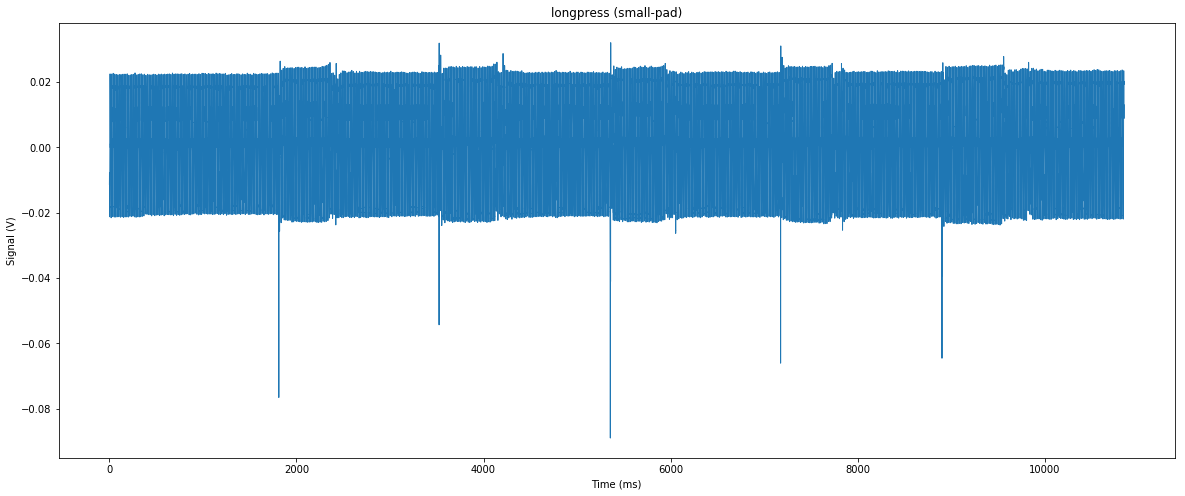

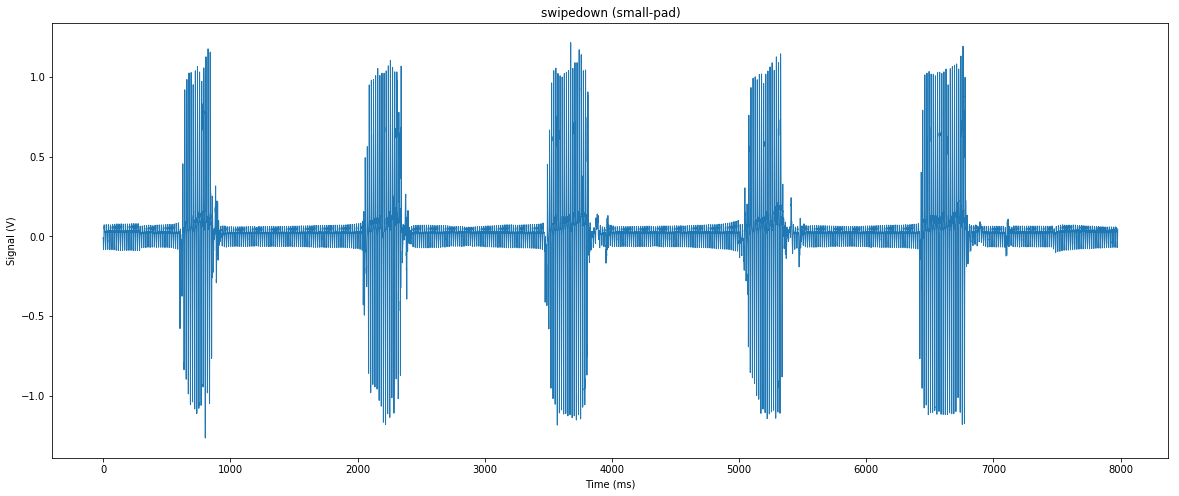

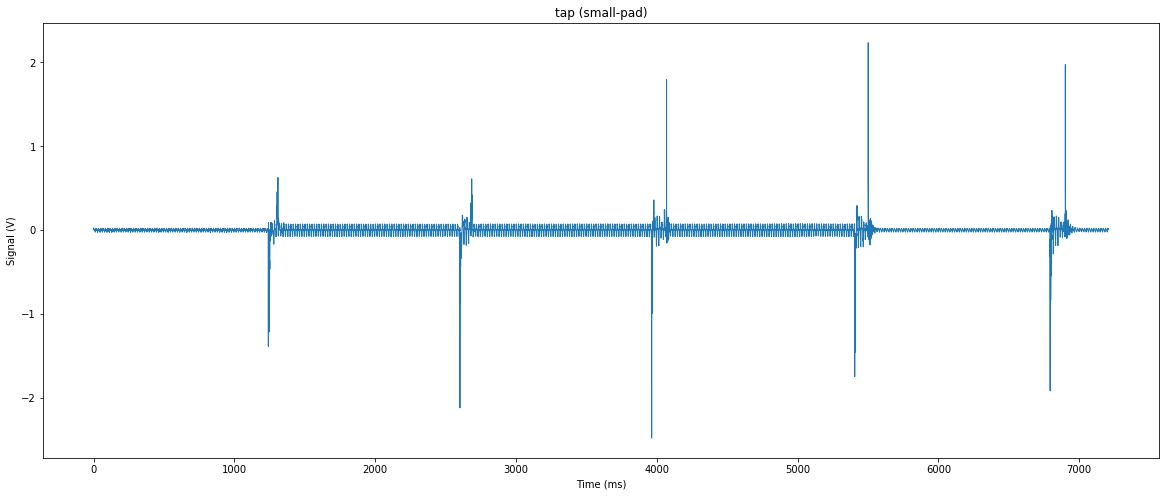

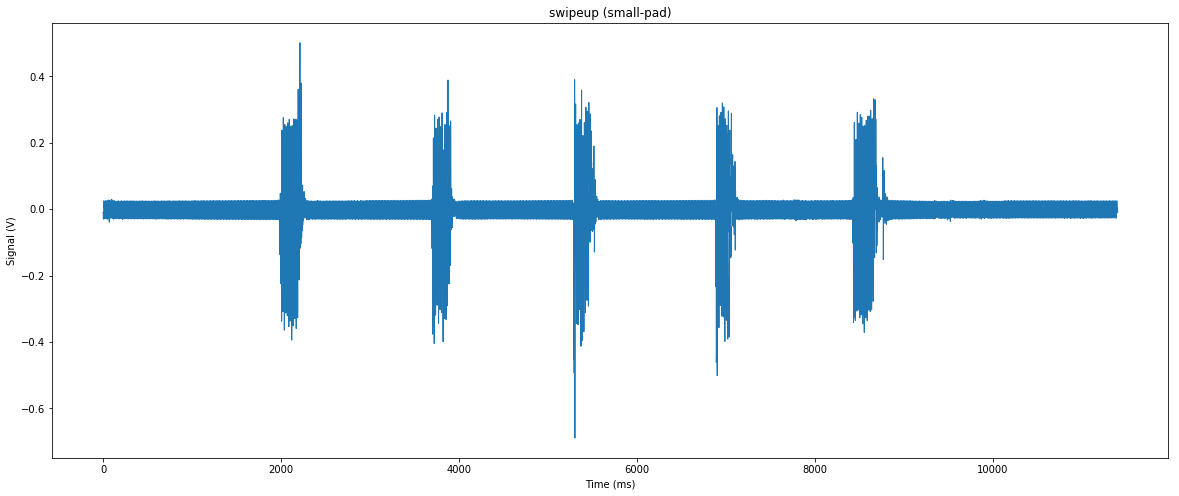

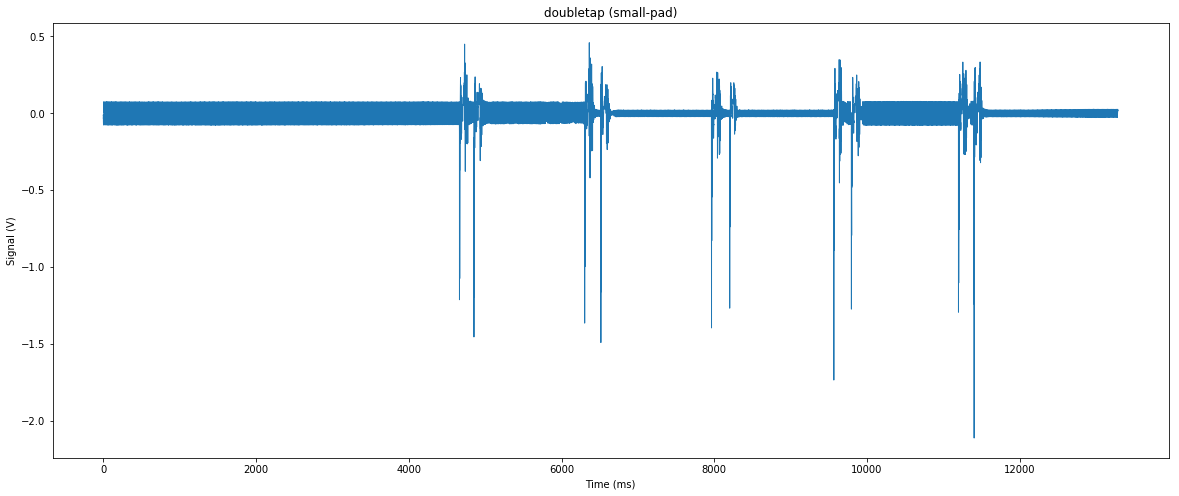

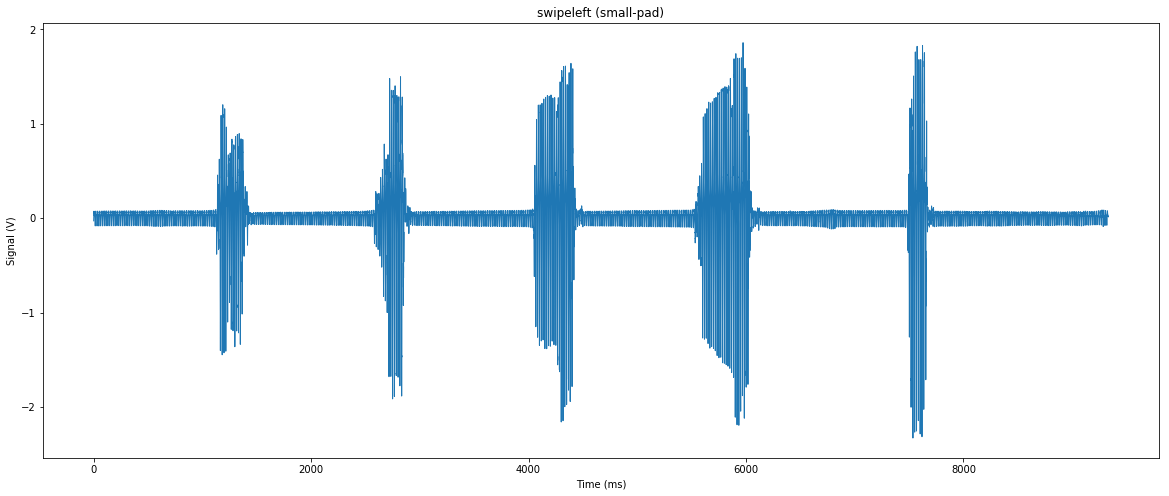

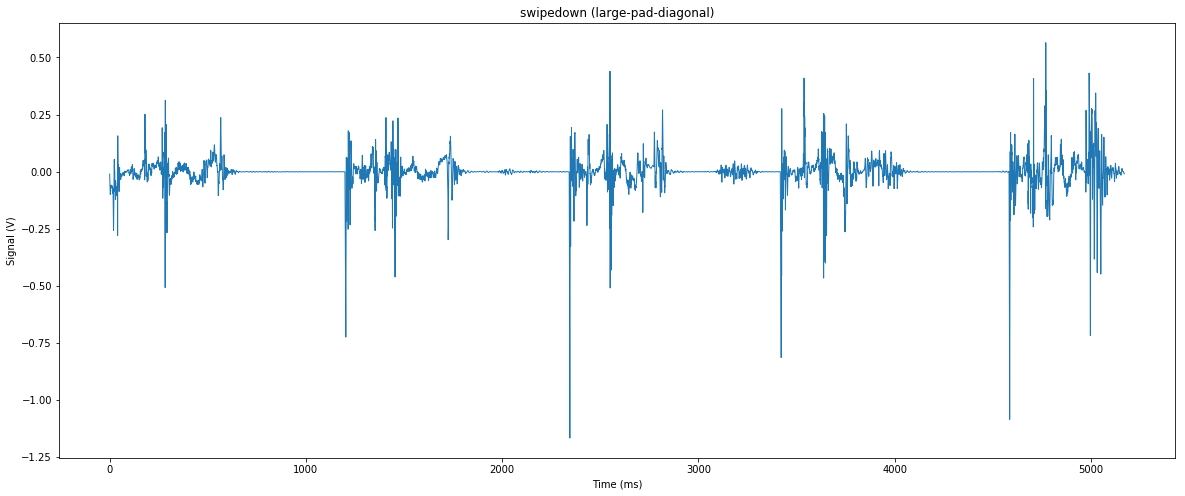

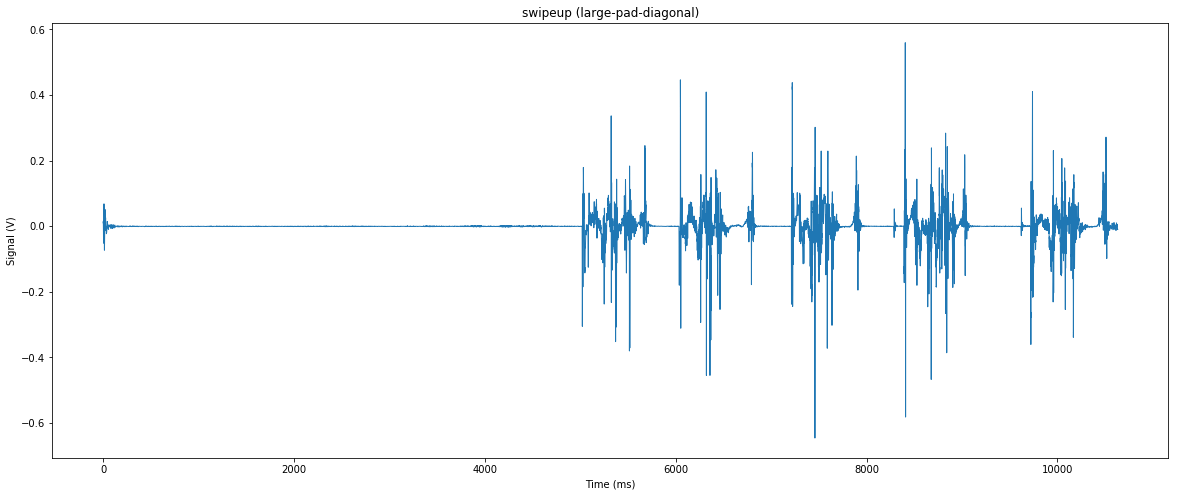

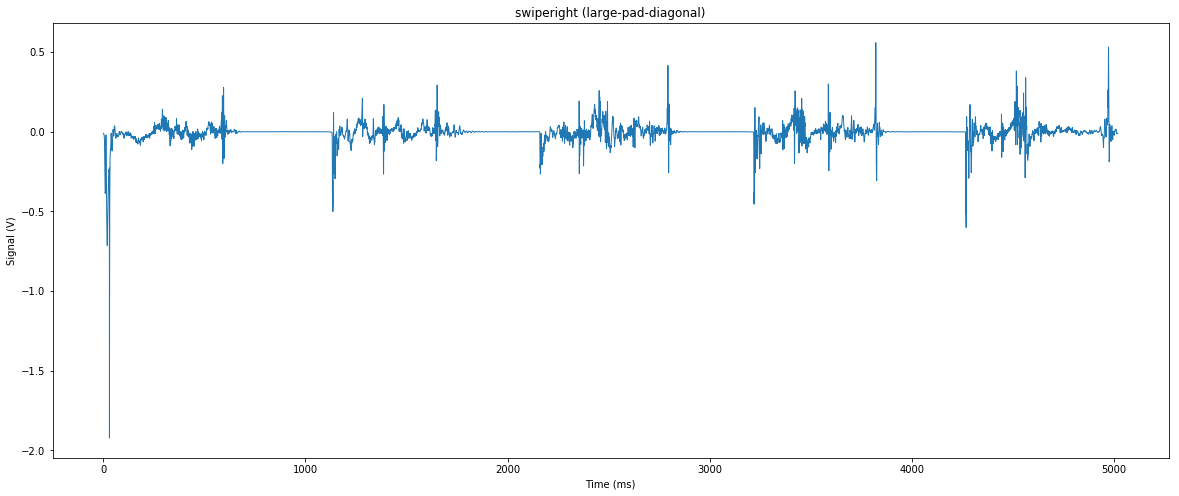

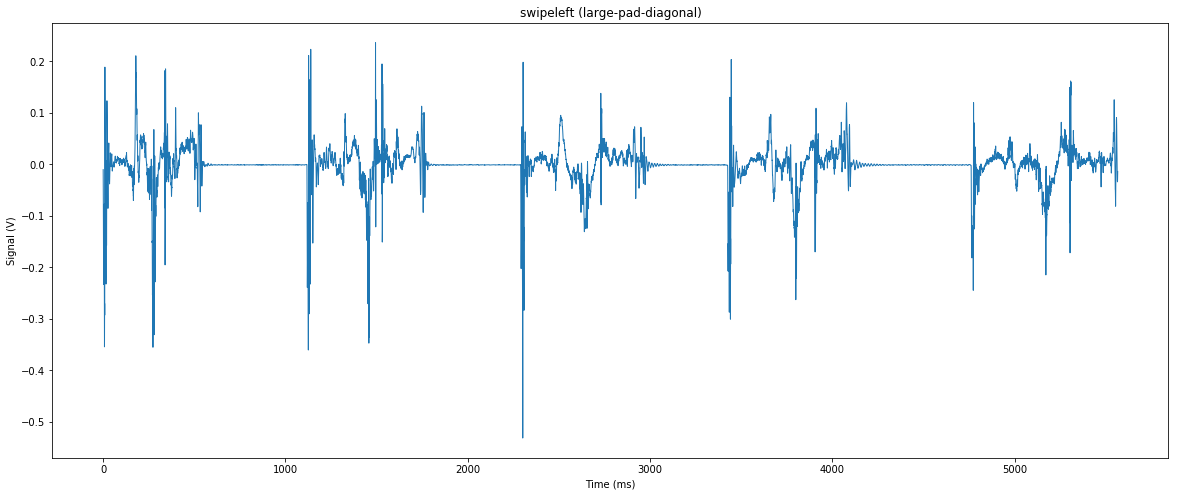

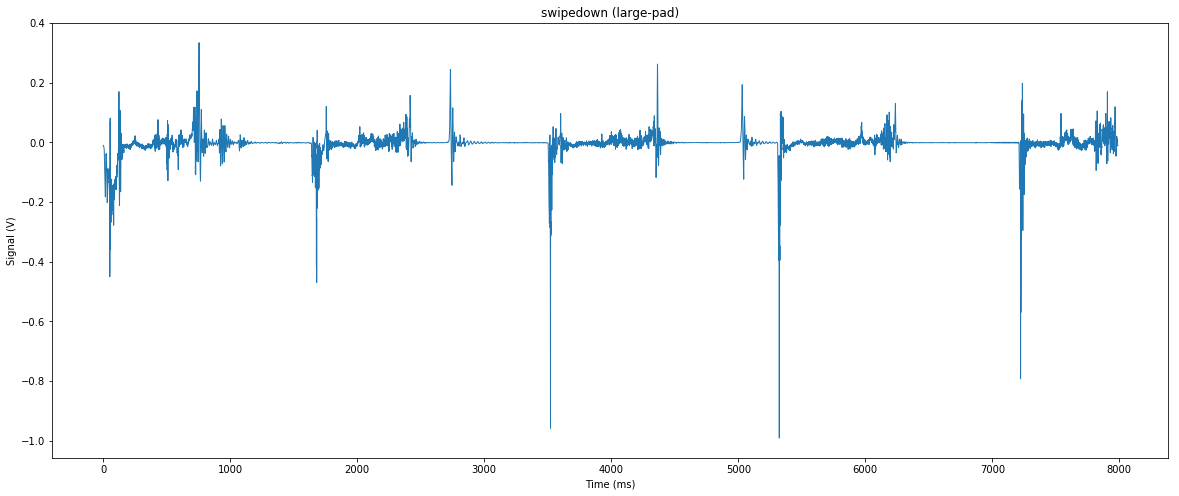

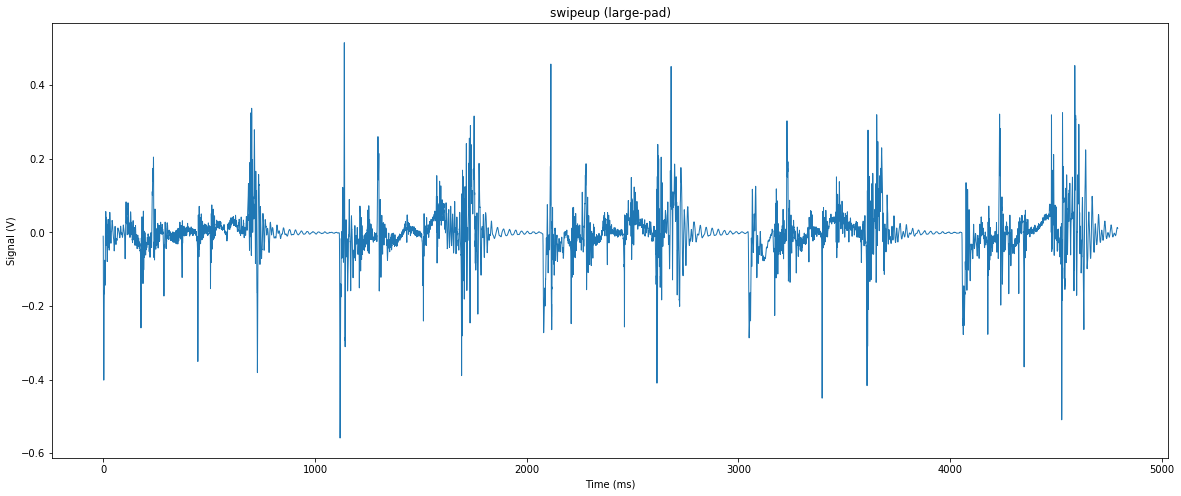

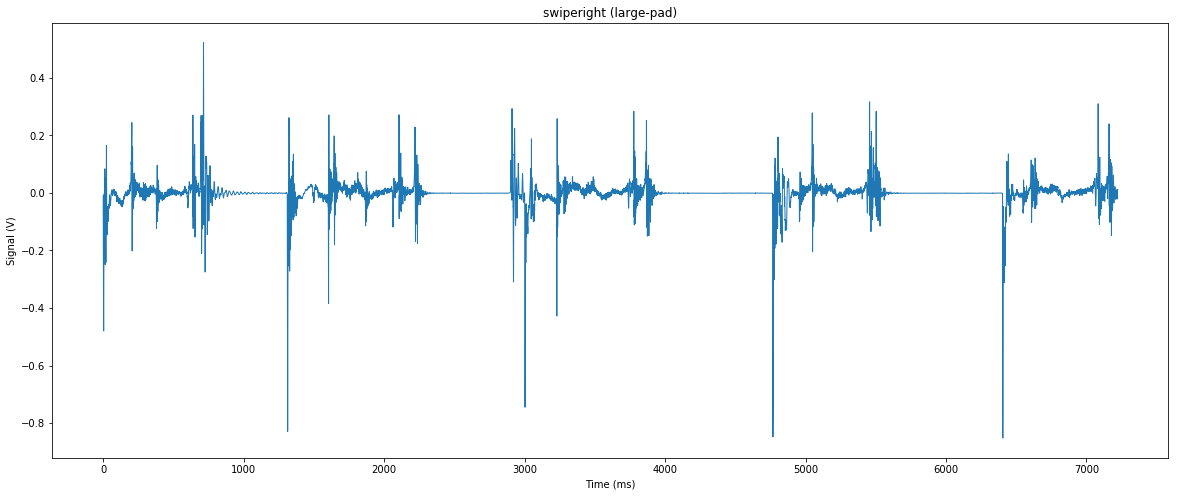

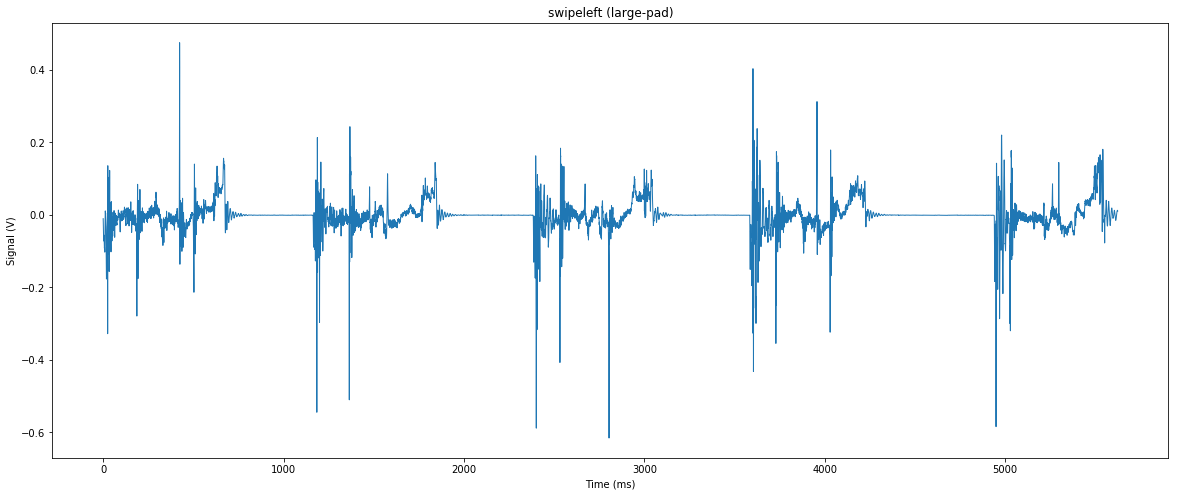

In [10]:
for (i, datum) in enumerate(data):
    df = load_dataset(datum)
    plt.figure(i)
    plt.ylabel('Signal (V)')
    plt.xlabel('Time (ms)')
    w = plt.plot([float(i)*(float(1)/50) for i in range(0, len(df))], df, linewidth=1.0)
    plt.title(datum['File'] + ' (' + datum['Dir'] + ')')

# Waveforms by Gesture

In [ ]:
g = {}
for (i, datum) in enumerate(data):
    if datum['File'] not in g:
        g[datum['File']] = []
    g[datum['File']].append(datum)
for (i, gesture) in enumerate(g.keys()):
    gdata = g[gesture]
    plt.figure(i)
    plt.ylabel('Signal (V)')
    plt.xlabel('Time (ms)')
    for datum in gdata:
        df = load_dataset(datum)
        w = plt.plot([float(i)*(float(1)/50) for i in range(0, len(df))], df, linewidth=1.0, label=datum['Dir'])
    plt.title('All ' + gesture + ' Gestures')